# In Wai Cheong (ic2518) <br> Homework 1 <br> COMS E6998 - Practical Deep Learning Systems Performance


In [1]:
!pip install mlxtend
import math
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## Question 1

1) Is this dataset linearly separable ? Can a linear classifer be trained using features $x_1$ and $x_2$ to classify
this data set ? You can plot the dataset points and argue.

### Answer:
The intersection of the convex hull formed by the two classes is non-empty, therefore the dataset is not linearly separable.

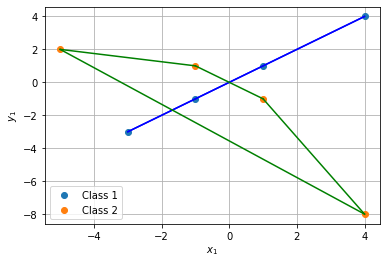

In [2]:
from scipy.spatial import ConvexHull

#Class 1
x = np.array([[-1,-1],[1,1],[-3,-3],[4,4]])

#Class 2
y = np.array([[-1,1],[1,-1],[-5,2],[4,-8]])

#Convex Hull of Class 1
hull = ConvexHull(x, qhull_options='QJ')
plt.plot(x[:,0], x[:,1], 'o', label='Class 1')
for simplex in hull.simplices:
    plt.plot(x[simplex, 0], x[simplex, 1],'b-')

#ConvexHull of Class 2
hull2 = ConvexHull(y)
plt.plot(y[:,0], y[:,1], 'o', label='Class 2')
for simplex2 in hull2.simplices:
    plt.plot(y[simplex2, 0], y[simplex2, 1], 'g-')

plt.legend(loc='lower left')
plt.xlabel('$x_1$')
plt.ylabel('$y_1$')
plt.grid()

2) Can you define a new 1-dimensional representation $z$ in terms of $x_1$ and $x_2$ such that the dataset is
linearly separable in terms of 1-dimensional representation corresponding to $z$?

### Answer:

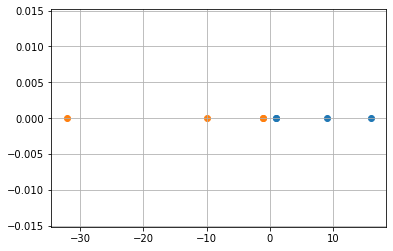

In [3]:
#Class 1
x = np.array([[-1,-1],[1,1],[-3,-3],[4,4]])

#Class 2
y = np.array([[-1,1],[1,-1],[-5,2],[4,-8]])

xz = np.array([1,1,9,16])
yz = np.array([-1,-1,-10,-32])

y0 = np.array([0,0,0,0])

plt.scatter(xz,y0)
plt.scatter(yz,y0)
plt.grid()

3) What does the separating hyperplane looks like ?

### Answer:
The separating hyperplane is just the point $(0,0)$.

4) Explain the importance of nonlinear transformations in classification problems.

### Answer:
If we had data that isn't linearly separable, we need nonlinear transformations so that the embedded data points can become linearly separable.

### Answer:

## Question 2

1) Derive the bias-variance decomposition for a regression problem, i.e., prove that the expected mean
squared error of a regression problem can be written as
$$E[MSE] = Bias^2 + V ariance + Noise$$

### Answer:

We have that: <br>
$$y=f(x)+\epsilon$$
$$MSE = \mathbb{E}[(y-\hat{f}(x))^2]$$
$$bias[\hat{f}(x)]=\mathbb{E}[\hat{f}(x)]-f(x)$$
$$var(\hat{f}(x)) = \mathbb{E}[(\hat{f}(x)-\mathbb{E}[\hat{f}(x)]^2]$$

Now:

$$MSE = \mathbb{E}[(y-\hat{f}(x))^2] = \mathbb{E}[(f(x)+\epsilon -\hat{f}(x))^2]$$
$$=\mathbb{E}[f(x)-\hat{f}(x))^2]+\mathbb{E}[\epsilon^2]+2\mathbb{E}[(f(x)-\hat{f}(x))\epsilon]$$
$$=\mathbb{E}[f(x)-\hat{f}(x))^2] + \sigma^2_\epsilon, \text{(since $\mathbb{E}[\epsilon]=0$)}$$ 

And now:

$$\mathbb{E}[f(x)-\hat{f}(x))^2]=\mathbb{E}[((f(x)-\mathbb{E}[\hat{f}(x)])-(\hat{f}(x)-\mathbb{E}[\hat{f}(x)]))^2]$$
$$=\mathbb{E}[(\mathbb{E}[\hat{f}(x)-f(x))^2]+\mathbb{E}[(\hat{f}(x)-\mathbb{E}[\hat{f}(x)])^2]
-2\mathbb{E}[(f(x)-\mathbb{E}\hat{f}(x)])(\hat{f}(x)-\mathbb{E}[\hat{f}(x)])^2]$$
$$=\mathbb{E}[\hat{f}(x)-f(x))^2]+\mathbb{E}[(\hat{f}(x)-\mathbb{E}[\hat{f}(x)])^2]
-2(f(x)-\mathbb{E}[\hat{f}(x)]) \mathbb{E}[(\hat{f}(x)-\mathbb{E}[\hat{f}(x)])]$$

From our definition of bias and variance we have:

$$\mathbb{E}[f(x)-\hat{f}(x))^2]=bias[\hat{f}(x)]^2 + var(\hat{f}(x))$$

Finally get get that:

$$MSE = \mathbb{E}[(y-\hat{f}(x))^2] = bias[\hat{f}(x)]^2 + var(\hat{f}(x)) + \sigma^2_\epsilon$$

So:

$$\fbox{$MSE = Bias^2 + Variance + Noise$}$$

2) Consider the case when $y(x) = x + sin(1.5x) + N(0, 0.3)$, here $f(x) = x + sin(1.5x)$ and $\epsilon = N(0, 0.3)$.
Create a dataset of size 20 points by randomly generating samples from $y$. Display the dataset and
$f(x)$. Use scatter plot for $y$ and smooth line plot for $f(x)$.

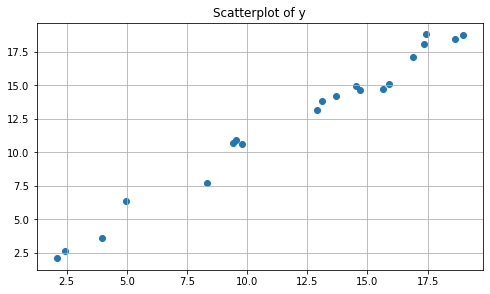

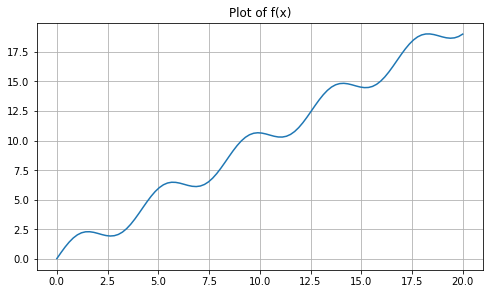

In [4]:
x = 20*np.random.random(20)
x = np.sort(x)
xs = np.linspace(0,20,100) #To generate a smooth f(x)

#y(x)
f = lambda x: x + np.sin(1.5*x)
y = f(x) + np.random.normal(0,0.3,20)

#Smooth f(x)
fx_s = xs + np.sin(1.5*xs)

#Scatterplot of y
fig = plt.figure(figsize=(8,10))
plt.subplot(2,1,1)
plt.title("Scatterplot of y")
plt.scatter(x,y)
plt.grid()

#Smooth line plot of f(x)
fig = plt.figure(figsize=(8,10))
plt.subplot(2,1,2)
plt.title("Plot of f(x)")
plt.grid()
plt.plot(xs,fx_s)

3) Use weighted sum of polynomials as an estimator function for $f(x)$, in particular, let the form of
estimator function be:
$$g_n(x)=\beta_0+\beta_1x+\beta_2x^2 + \ldots + \beta_nx^n$$
Consider three candidate estimators, $g_1, g_3$ and $g_{10}$. Estimate the coefficients of each of the three
estimators using the sampled dataset and plot $f(x), g_1(x), g_3(x), g_{10}(x)$. Which estimator is underfitting
? Which one is overfitting ?

### Answer:
None seem to be underfitting but $g_{10}(x)$ seems to be overfitting.

Degree 1 Coefficients: [0.98386001 0.51055185]
Degree 3 Coefficients: [ 1.45881666e-03 -5.42803751e-02  1.56756542e+00 -1.03206061e+00]
Degree 10 Coefficients: [-5.83549857e-08  6.40466583e-06 -3.04493437e-04  8.20630249e-03
 -1.37823746e-01  1.49445462e+00 -1.04941933e+01  4.66402003e+01
 -1.24325603e+02  1.79374838e+02 -1.04627727e+02]


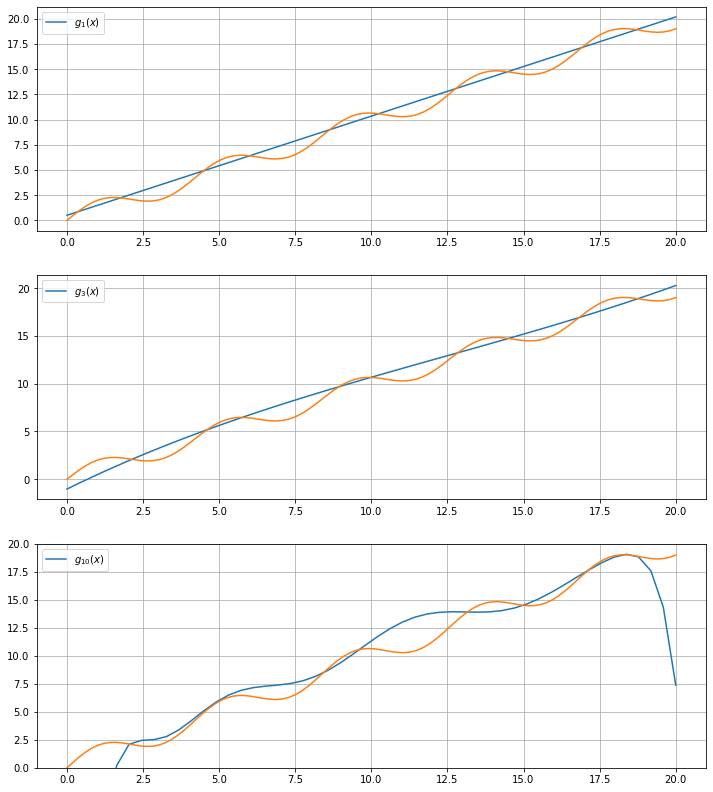

In [5]:
#Fitting g1, g3, and g10
p1 = np.polyfit(x,y,1)
p3 = np.polyfit(x,y,3)
p10 = np.polyfit(x,y,10)

xl = np.linspace(0,20,50)
deg1 = np.array([xl**1,xl**0])
deg3 = np.array([xl**3,xl**2,xl**1,xl**0])
deg10 = np.array([xl**10,xl**9,xl**8,xl**7,xl**6,xl**5,xl**4,xl**3,xl**2,xl**1,xl**0])

#Plotting


fig = plt.figure(figsize=(12,14))
plt.subplot(3,1,1)
plt.plot(xl,np.dot(p1,deg1),label='$g_1(x)$')
plt.plot(xs,fx_s)
plt.legend()
plt.grid()

plt.subplot(3,1,2)
plt.plot(xl,np.dot(p3,deg3),label='$g_3(x)$')
plt.plot(xs,fx_s)
plt.legend()
plt.grid()

plt.subplot(3,1,3)
plt.plot(xl,np.dot(p10,deg10),label='$g_{10}(x)$')
plt.plot(xs,fx_s)
plt.ylim(0,20)
plt.legend()
plt.grid()

#Coefficients from highest power to lowest
print('Degree 1 Coefficients:',p1)
print('Degree 3 Coefficients:',p3)
print('Degree 10 Coefficients:',p10)

4) Generate 100 datasets (each of size 50) by randomly sampling from $y$. Partition each dataset into
training and test set (80/20 split). Next fit the estimators of varying complexity, i.e., $g_1, g_2,\ldots,g_{15}$ using
the training set for each dataset. Then calculate and display the squared bias, variance, and error
on testing set for each of the estimators showing the tradeoff between bias and variance with model
complexity. Can you identify the best model ?

### Answer:

In [14]:
from sklearn.metrics import mean_squared_error, r2_score
from mlxtend.evaluate import bias_variance_decomp
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

x = 20*np.random.random(50)
x = np.sort(x)
f = lambda x: x + np.sin(1.5*x)
dataset = []
degree = range(1,16)

#Generating 100 datasets of size 50 from y
for i in range(100):
    y = f(x) + np.random.normal(0,0.3,50)
    dataset.append(y)
    
x_rs = x.reshape(-1,1)
dataset2 = np.array(dataset)

mse_list = []
bias_list = []
variance_list = []

#Partitioning each data set into 80/20 split and training
for j in range(100):
    #Splitting training and test set
    X_train, X_test, y_train, y_test = train_test_split(x_rs, dataset2[j], test_size=0.20,random_state=0)

    # Implementing the model on datasets
    for i in degree:   
        #Model
        polynomial_features= PolynomialFeatures(degree=i)
        x_poly = polynomial_features.fit_transform(x_rs)
        model = LinearRegression()
        model.fit(X_train, y_train)

        #Metrics
        mse, bias, var = bias_variance_decomp(model, X_train, y_train.flatten(), X_test, y_test.flatten(), loss='mse', num_rounds=50)
        mse_list.append(mse)
        bias_list.append(bias**2)
        variance_list.append(var)

In [15]:
mse_tot = []
bias_tot = []
variance_tot = []

i=0
j=100

#Averaging the values of the metrics for the different complexities
while i<1401 and j<1501:
    mse_tot.append(np.mean(mse_list[i:j]))
    bias_tot.append(np.mean(bias_list[i:j]))
    variance_tot.append(np.mean(variance_list[i:j]))
    i=i+100
    j=j+100

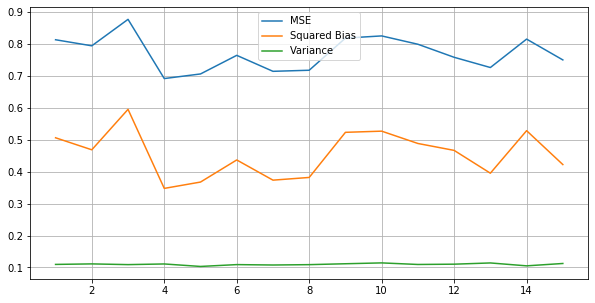

In [16]:
complexity=range(1,16)

#Plotting
fig = plt.figure(figsize=(10,5))
plt.plot(complexity,mse_tot,label='MSE')
plt.plot(complexity,bias_tot,label='Squared Bias')
plt.plot(complexity,variance_tot, label='Variance')
plt.grid()
plt.legend()

5) One way to increase model bias is by using regularization. Lets take the order 10 polynomial and
apply $L_2$ regularization. Compare the bias, variance, and MSE of the regularized model with the
unregularized order 10 polynomial model ? Does the regularized model have a higher or lower bias ?
What about MSE ? Explain.

### Answer:

After using $L_2$ regularization, the model has a higher MSE and bias.

In [9]:
from sklearn.model_selection import train_test_split, cross_val_score 
from statistics import mean 


x = np.random.random(50)
fx = x + np.sin(1.5*x)
e = np.random.normal(0,0.3,50)
y = fx + e
x_rs = x.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(x_rs, y, test_size=0.20)

#Bulding and fitting the Linear Regression model 
polynomial_features= PolynomialFeatures(degree=10)
x_poly = polynomial_features.fit_transform(x_rs)
linearModel = LinearRegression() 
linearModel.fit(x_rs, y)

rp = linearModel.predict(X_test)
mse, bias, var = bias_variance_decomp(linearModel, X_train, y_train, X_test, y_test, loss='mse', num_rounds=200, random_seed=1)
# summarize results
print('MSE: %.3f' % mse)
print('Bias: %.3f' % bias)
print('Variance: %.3f' % var)
print('\n')
  


#List to maintain the different cross-validation scores 
cross_val_scores_ridge = [] 
  
#List to maintain the different values of alpha 
alpha = [] 
  
#Loop to compute the different values of cross-validation scores 
for i in range(1, 9): 
    ridgeModel = Ridge(alpha = i * 0.25) 
    ridgeModel.fit(X_train, y_train) 
    scores = cross_val_score(ridgeModel, x_rs, y, cv = 10) 
    avg_cross_val_score = mean(scores)*100
    cross_val_scores_ridge.append(avg_cross_val_score) 
    alpha.append(i * 0.25) 

#Building and fitting the Ridge Regression model 
ridgeModelChosen = Ridge(alpha = 2) 
ridgeModelChosen.fit(X_train, y_train) 


#Metrics
rp = ridgeModelChosen.predict(X_test)
mse2, bias2, var2 = bias_variance_decomp(ridgeModel, X_train, y_train, X_test, y_test, loss='mse', num_rounds=200, random_seed=1)
# summarize results
print('MSE Regularized: %.3f' % mse2)
print('Bias Regularized: %.3f' % bias2)
print('Variance Regularized: %.3f' % var2)


MSE: 0.531
Bias: 0.518
Variance: 0.013


MSE Regularized: 0.559
Bias Regularized: 0.550
Variance Regularized: 0.008


## Question 3

1) Summarize the attributes of each dataset: number of features, number of instances, number of classes,
number of numerical features, number of categorical features.

### Answer:

Dataset 1 has 748 instances, 5 features, 2 classes, 4 numerical features, 1 categorical <br>
Dataset 2 has 625 instances, 5 features, 3 classes, 4 numerical features, 1 categorical

In [10]:
#Dataset 1 from 'https://www.openml.org/d/1464'
data1 = pd.read_csv('Blood_Transfusion.csv')
data1.head()

,V1,V2,V3,V4,Class
0,2,50,12500,98,2
1,0,13,3250,28,2
2,1,16,4000,35,2
3,2,20,5000,45,2
4,1,24,6000,77,1


In [11]:
#Dataset 2 from 'https://www.openml.org/d/11'
data2 = pd.read_csv('dataset_11_balance-scale.csv')
data2.head()

,left-weight,left-distance,right-weight,right-distance,class
0,1,1,1,1,B
1,1,1,1,2,R
2,1,1,1,3,R
3,1,1,1,4,R
4,1,1,1,5,R


2) For each dataset, select 80% of data as training set and remaining 20% as test set. Generate 10 different
subsets of the training set by randomly subsampling 10%, 20%, ... , 100% of the training set. Use each
of these subsets to train two different classifiers: Random forest and Gradient boosting. When training
a classifier also measure the wall clock time to train. After each training, evaluate the accuracy of
trained models on the test set. Report model accuracy and training time for each of the 10 subsets of
the training set. Generate learning curve for each classifier. A learning curve shows how the accuracy
changes with increasing size of training data. Also create a curve showing the training time of classifiers
with increasing size of training data. So, for each dataset you will have two figures: First figure showing
learning curves (x-axis being training data size and y-axis accuracy) for the two classifiers and second
Figure showing training time for the two classifiers as a function of training data size.

### Dataset 1

In [12]:
y = np.array(data1['Class'])
data1_drop = data1.drop(columns=['Class'])

#Splitting Training and Test Set
X_train, X_test, y_train, y_test = train_test_split(data1_drop, y, test_size=0.20)

In [13]:
#Random Forest Classifier

import time
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

size = np.array([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])
clf = RandomForestClassifier()
training_time_rf1 = [] #stores training time of rfc of dataset 1
accuracy_rf1 = [] #stores accuracy of rfc of dataset 1

for i in size:
    #Splitting training & test sets
    X_train2, X_test2, y_train2, y_test2 = train_test_split(X_train, y_train, test_size=i)
    
    #Calculating training time
    tic = time.time()
    clf.fit(X_train2, y_train2)
    toc = time.time()
    training_time_rf1.append((toc-tic)*1000)
    
    #Evaluation Metrics
    y_pred = clf.predict(X_test2)
    accuracy_rf1.append(accuracy_score(y_test2, y_pred))

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [14]:
#Gradient Boosting Classifer

from sklearn.ensemble import GradientBoostingClassifier
clf2 = GradientBoostingClassifier(random_state=0)

training_time_gb1 = [] #stores training time of classifier of dataset 1
accuracy_gb1 = [] #stores accuracy of classifier of dataset 1

for i in size:
    #Splitting training sets into different sizes
    X_train2, X_test2, y_train2, y_test2 = train_test_split(X_train, y_train, test_size=i)
    
    #Calculating time
    tic = time.time()
    clf2.fit(X_train2, y_train2)
    toc = time.time()
    training_time_gb1.append((toc-tic)*1000)
    
    #Evaluation Metrics
    y_pred = clf.predict(X_test2)
    accuracy_gb1.append(accuracy_score(y_test2, y_pred))

### Dataset 2

In [15]:
y2 = np.array(data2['class'])
data2_drop = data2.drop(columns=['class'])

#Splitting Training and Test Set
X_train, X_test, y_train, y_test = train_test_split(data2_drop, y2, test_size=0.20)

In [16]:
#Random Forest Classifier Dataset 2

clf = RandomForestClassifier()
training_time_rf2 = [] #stores training time of classifier on dataset 2
accuracy_rf2 = [] #stores accuracy of classifier on dataset 2

for i in size:
    #Splitting training and test sets
    X_train2, X_test2, y_train2, y_test2 = train_test_split(X_train, y_train, test_size=i)
    
    #Calculating training time
    tic = time.time()
    clf.fit(X_train2, y_train2)
    toc = time.time()
    training_time_rf2.append((toc-tic)*1000)

    #Evaluation Metrics
    y_pred = clf.predict(X_test2)
    accuracy_rf2.append(accuracy_score(y_test2, y_pred))

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [17]:
#Gradient Boosting Classifer Dataset 2

from sklearn.ensemble import GradientBoostingClassifier
clf2 = GradientBoostingClassifier(random_state=0)

training_time_gb2 = [] #stores training of classifier on dataset 2
accuracy_gb2 = [] #stores accuracy of classifier on dataset 2

for i in size:
    #Splitting training & test sets
    X_train2, X_test2, y_train2, y_test2 = train_test_split(X_train, y_train, test_size=i)
    
    #Calculate training time
    tic = time.time()
    clf2.fit(X_train2, y_train2)
    toc = time.time()
    training_time_gb2.append((toc-tic)*1000)

    #Evaluation Metrics
    y_pred = clf.predict(X_test2)
    accuracy_gb2.append(accuracy_score(y_test2, y_pred))

## Plotting metrics

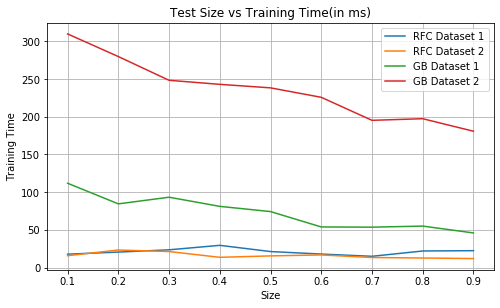

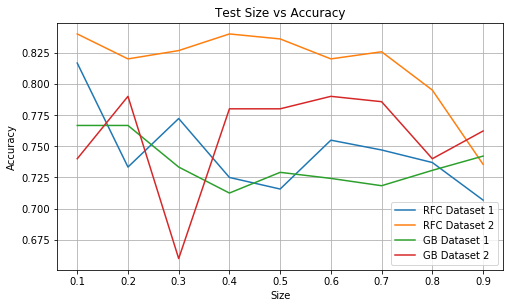

In [18]:
#Plotting test size vs training time of Random Forest Classifier on Dataset 1 & 2
plt.figure(figsize=(8,10))
plt.subplot(2,1,1)
plt.title('Test Size vs Training Time(in ms)')
plt.xlabel("Size")
plt.ylabel("Training Time")
plt.plot(size, training_time_rf1, label='RFC Dataset 1')
plt.plot(size, training_time_rf2, label='RFC Dataset 2' )
plt.plot(size, training_time_gb1, label='GB Dataset 1')
plt.plot(size, training_time_gb2, label='GB Dataset 2' )
plt.legend()
plt.grid()

#Plotting test size vs training time of Gradient Boosting on Dataset 1 & 2
plt.figure(figsize=(8,10))
plt.subplot(2,1,2)
plt.title('Test Size vs Accuracy')
plt.xlabel("Size")
plt.ylabel("Accuracy")
plt.plot(size, accuracy_rf1, label='RFC Dataset 1')
plt.plot(size, accuracy_rf2, label='RFC Dataset 2')
plt.plot(size, accuracy_gb1, label='GB Dataset 1')
plt.plot(size, accuracy_gb2, label='GB Dataset 2')
plt.legend()
plt.grid()

3) Study the scaling of training time and accuracy of classifiers with training data size using the two
figures generated in part 2 of the question. Compare the performance of classifiers in terms of training
time and accuracy and write 3 main observations. Which gives better accuracy? Which has shorter
training time?

### Answer:
For training time, random forest takes less time. (and on dataset 2). <br>
For accuracy, random forest also seems to have the most accuracy. <br>

Observations: <br>
1) Training time doesn't seem to change significantly as test size increases. <br>
2) Gradient boosting takes significantly longer on dataset 2, but the accuracy doesn't seem to change too much <br>
3) RFC on dataset 2 seems to decrease significantly after test size = 0.7 <br>
4) Also, every time I run the code, the accuracy graph changes a bit. 

## Question 4

1) Does true negative matter for both ROC and PR curve ? Argue why each point on ROC curve corresponds to a unique point on PR curve?

### Answer:
For PR curve, TN doesnt't matter since precision FP to TP and recall compares FN to TP. 
But TN matters for ROC curve, as TN matters when computing the false positive rate. 
Because in PR space TN is ignored, TN is uniquely determined if we have a fixed P and N examples - and we won't know
FP if recall = 0, so there isn't a unique confusion matrix whereas we have a unique confusion matrix in ROC space
corresponding to a point. So this means the mapping between ROC space and PR space is a bijection, so each point on the ROC curve
corresponds to a unique point on the PR curve. 

2) Select one OpenML dataset with 2 output classes. Use two binary classifiers (Adaboost and Logistic
regression) and create ROC and PR curves for each of them. You will have two figures: one containing
two ROC and other containing two PR curves. Show the point where an all positive classifier lies in
the ROC and PR curves.

### Answer:
In the ROC, an all positive classifier lies on the point $(1,1)$ since everything we will have a TP = 1. <br>
In the PR curve, FN = 0 so recall = 1, we get the point $(1,0.77)$

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


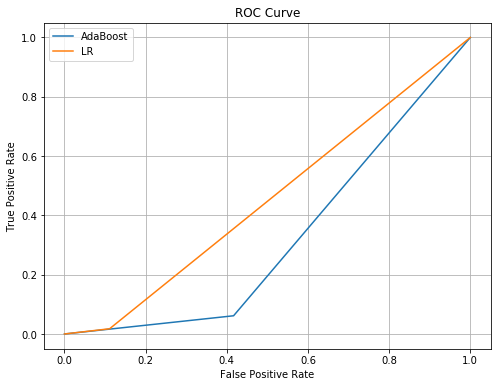

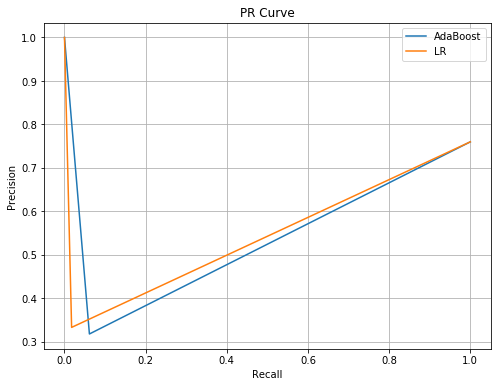

In [19]:
from sklearn import metrics
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve

y = np.array(data1['Class'])
data1_drop = data1.drop(columns=['Class'])

#Splitting Training and Test Set
X_train, X_test, y_train, y_test = train_test_split(data1_drop, y, test_size=0.20)

#Adaboost
clf = AdaBoostClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
fpr1, tpr1, thresholds1 = metrics.roc_curve(y_test, y_pred, pos_label=1)
precision1, recall1, thresholds2 = precision_recall_curve(y_test, y_pred, pos_label=1)

#LR
clf2 = LogisticRegression()
clf2.fit(X_train, y_train)
y_pred2 = clf2.predict(X_test)
fpr2, tpr2, thresholds3 = metrics.roc_curve(y_test, y_pred2, pos_label=1)
precision2, recall2, thresholds4 = precision_recall_curve(y_test, y_pred2, pos_label=1)


#Plot Metrics for ROC
plt.figure(figsize=(8,6))
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(fpr1, tpr1, label='AdaBoost')
plt.plot(fpr2, tpr2, label='LR')
plt.legend()
plt.grid()

#Plot Metrics for PR
plt.figure(figsize=(8,6))
plt.title('PR Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.plot(recall1, precision1, label='AdaBoost')
plt.plot(recall2, precision2, label='LR')
plt.legend()
plt.grid()

3) NIPS paper defined PR Gain curve. Calculate AUROC (Area under ROC), AUPR (Area under PR),
and AUPRG (Area under PRG) for two classifiers and compare. Do you agree with the conclusion of
NIPS paper that practitioners should use PR gain curves rather than PR curves.

### Answer:

AdaBoost AUROC: 0.6093039942597465 <br>
Logistic Regression AUROC: 0.5363549390098062

Adaboost AUPR: 0.6608954909397387 <br>
Logistic Regression AUPR: 0.6310324483775812

Adaboost AUPRG: $\infty$ <br>
Logistic Regression AUPRG: $\infty$

Does this mean we should use PRG or PR? I think it depends. PRG is preferred if you want to ignore negative gains, but in cases where you would take negative gains into account,
PR is better. But if you have a very complex class distribution, PRG is useful.

In [20]:
#AUROC
print('AdaBoost AUROC:', metrics.roc_auc_score(y_test,y_pred))
print('Logistic Regression AUROC:', metrics.roc_auc_score(y_test,y_pred2))
print('\n')

#AUPR
print('Adaboost AUPR:', metrics.auc(recall1, precision1))
print('Logistic Regression AUPR:', metrics.auc(recall2, precision2))

AdaBoost AUROC: 0.6776315789473685
Logistic Regression AUROC: 0.5467836257309941


Adaboost AUPR: 0.5464593301435408
Logistic Regression AUPR: 0.5487719298245614


Adaboost AUPRG: inf
Logistic Regression AUPRG: inf


/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.
/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in true_divide
  if __name__ == '__main__':


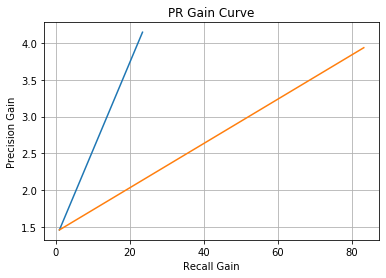

In [21]:
## AdaBoost (PRG)

precision_gain1 = (precision1 - np.pi)/((1-np.pi)*precision1)
recall_gain1 = (recall1 - np.pi)/((1-np.pi)*recall1)

#Logistic Regression (PRG)

precision_gain2 = (precision2 - np.pi)/((1-np.pi)*precision2)
recall_gain2 = (recall2 - np.pi)/((1-np.pi)*recall2)

#Plotting PRG
plt.title('PR Gain Curve')
plt.xlabel('Recall Gain')
plt.ylabel('Precision Gain')
plt.plot(recall_gain1, precision_gain1, label='AdaBoost')
plt.plot(recall_gain2, precision_gain2, label='LR')
plt.grid()

#AUPRG
print('Adaboost AUPRG:', metrics.auc(recall_gain1, precision_gain1))
print('Logistic Regression AUPRG:', metrics.auc(recall_gain2, precision_gain2))